In [1]:
%matplotlib inline
import os

import numpy as np
import xarray as xr

import utils

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors

import cartopy
import cartopy.crs as ccrs
import cmocean

In [2]:
ds = xr.open_zarr('data/Ncycle.zarr').compute()
ds

<xarray.Dataset>
Dimensions:    (nlat: 384, nlon: 320)
Coordinates:
    TLAT       (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG      (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
Dimensions without coordinates: nlat, nlon
Data variables:
    AREA       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    DENITRIF   (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan
    diaz_Nfix  (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan

In [3]:
dsp = utils.pop_add_cyclic(ds)
dsp

<xarray.Dataset>
Dimensions:    (nlat: 384, nlon: 321)
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT       (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 80.31 80.31 80.31
    TLONG      (nlat, nlon) float64 -220.6 -219.4 -218.3 ... -39.57 -39.86
    AREA       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    DENITRIF   (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan
    diaz_Nfix  (nlat, nlon) float32 nan nan nan nan nan ... nan nan nan nan nan

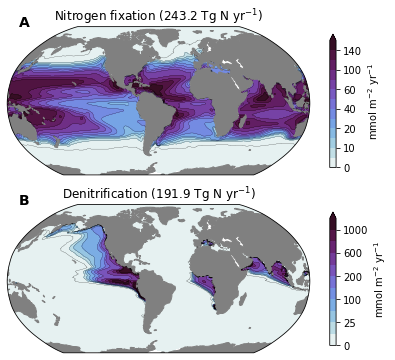

In [4]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=(1, 0.02,))

prj = ccrs.Robinson(central_longitude=305.0)

axs = []
maps = []

levels = dict(
    diaz_Nfix=[0., 5., 10., 15., 20., 30., 40., 50., 60., 80., 100., 120., 140., 200., ],
    DENITRIF=[0., 10., 25., 50., 100., 150., 200., 400., 600., 800., 1000., 1500., ]
)

cmap_field = cmocean.cm.dense

contour_spec = dict(
    diaz_Nfix=dict(
        levels=levels['diaz_Nfix'],
        extend='max',
        cmap=cmap_field,
        norm=colors.BoundaryNorm(levels['diaz_Nfix'], ncolors=cmap_field.N),
    ),
    DENITRIF=dict(
        levels=levels['DENITRIF'],
        extend='max',
        cmap=cmap_field,
        norm=colors.BoundaryNorm(levels['DENITRIF'], ncolors=cmap_field.N),
    ),
)

for i, var in enumerate(['diaz_Nfix', 'DENITRIF']):
    
    ax = plt.subplot(gs[i, 0], projection=prj)                         
    maps.append(ax)
    
    cf = ax.contourf(dsp.TLONG,
                     dsp.TLAT,
                     dsp[var],
                     **contour_spec[var],
                     transform=ccrs.PlateCarree())

    cl = ax.contour(dsp.TLONG,
                     dsp.TLAT,
                     dsp[var],
                     levels=levels[var],
                     colors='k', linewidths=0.2,
                     transform=ccrs.PlateCarree())
    
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature(
            'physical','land','110m',
            edgecolor='face',
            facecolor='gray'
        )
    )  
                             
    ax.set_title(dsp[var].attrs['title_str'])

    cb = plt.colorbar(cf, shrink=0.9)
    cb.set_label(dsp[var].units)
    
utils.label_plots(fig, maps, xoff=0.02, yoff=0)       
utils.savefig('Ncycle')